 This is a dataset from IBM Watson Analytics. This dataset gives information about customers. We can predict their behavior to retain customers. 

 Data Description
1. Customer - Customer ID, it is unique value

2. State - There are five location where customers live in states (Washington,Arizona, Nevada, California, Oregon)

3. Customer Lifetime Value - Value of customers insurance

4. Response - This will be our dependent variable. with categorical response “Yes” if the customers would like to renew their insurance and “No” if the customers would discontinue their insurance.

5. Coverage - There are 3 types of coverage insurances (Basic, Extended and Premium)

6. Education - Background education of customers (High School or Below, Bachelor, College, Master and Doctor)

7. Effective To Date - The first date when customer would like to actived their car insurance

8. Employment Status - Customer employemen status whether they are Employed, Unemployed, Medical Leave, Disabled, or Retired

9. Gender - F for Female and M for Male

10. Income - Customers income

11. Location Code - Where the customers live likes in Rural, Suburban, and Urban.

12. Marital Status - Customer marital status (Divorced, Married or Single)

13. Monthly Premium Auto - Premium auto that customers need to pay every month

14. Months Since Last Claim - Number of months since customers did last claim

15. Months Since Policy Inception - Number of months since customers did policy inception

16. Number of Open Complaints - Number of complaints

17. Number of Policies - Number of policies in when customers take part of car insurance

18. Policy Type - There are three type of policies in car insurance (Corporate Auto, Personal Auto, and Special Auto)

19. Policy - 3 variety of policies in insurance. There are three policies in each policy types (Corporate L3, Corporate L2, Corporate L1, Personal L3,Personal L2, Personal L1,Special L3, Special L2, Special L1)

20. Renew Offer Type - Each sales of Car Insurance offer 4 type of new insurances to customers. There are Offer 1, Offer 2, Offer 3 and Offer 4

21. Sales Channel - Each sales offer new car insurance by Agent, Call Center, Web and Branch

22. Total Claim Amount - Number of Total Claim Amount when customer did based on their coverage and other considerations.

23. Vehicle Class - Type of vehicle classes that customers have Two-Door Car, Four-Door Car SUV, Luxury SUV, Sports Car, and Luxury Car

24. Vehicle Size - Type of customers vehicle size, there are small, medium and large

## Table of contents

* [Part 1. Exploratory Data Analysis](#part1)

* [Part 2. Preprocessing & Feature Engineering](#part2)

* [Part 3. Training & model building](#part3)

* [Part 4. Conclusion](#part4)


### Exploratory Data Analysis  <a class="anchor" id="part1"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import Pipeline, make_pipeline
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, f1_score, roc_auc_score, roc_curve, make_scorer
!pip install imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline as pipe_imb
from imblearn.metrics import classification_report_imbalanced

In [2]:
!pip install xgboost

from xgboost import XGBClassifier

In [3]:
!pip install catboost

from catboost import CatBoostClassifier

In [4]:
! pip install graphviz==0.19.1

In [5]:
!pip install lightgbm

from lightgbm import LGBMClassifier

In [6]:
!pip install plot-metric
from plot_metric.functions import BinaryClassification

In [7]:
data = pd.read_csv('Customer_Analysis.csv')

In [8]:
#set option for displaying all the columns
pd.set_option('display.max_columns', 24)
pd.set_option('display.max_rows', 50)

In [9]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [11]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Customer,9134,9134,TM98684,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State,9134,5,California,3150,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer Lifetime Value,9134,NaN,NaN,NaN,8004.94,6870.97,1898.01,3994.25,5780.18,8962.17,83325.4
Response,9134,2,No,7826,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Coverage,9134,3,Basic,5568,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,9134,5,Bachelor,2748,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Effective To Date,9134,59,1/10/11,195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmploymentStatus,9134,5,Employed,5698,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,9134,2,F,4658,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,9134,NaN,NaN,NaN,37657.4,30379.9,0,0,33889.5,62320,99981


  Dataframe contains 9134 customers with information about their income, education, gender etc. Each customer owns a car and the insurance company offers 4 different car insurances to them. 
  
  The target of this dataset is the Response. The response "Yes" - the customer accept the offer, and "No" - the customer didn't accept the offer.

In [12]:
#checking the proportions of the target variable
data['Response'].value_counts()/data.shape[0] * 100

No     85.679877
Yes    14.320123
Name: Response, dtype: float64

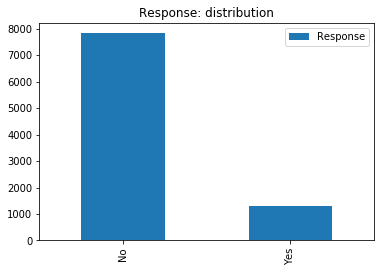

In [13]:
#plot of the target variable
data['Response'].value_counts().plot(kind='bar', label='Response')
plt.legend()
plt.title('Response: distribution');

There are almost 6 times more rejected customers than those who have agreed => So we clearly see that our target variable is not balanced, but we'll think about it later, let's continue our analysis

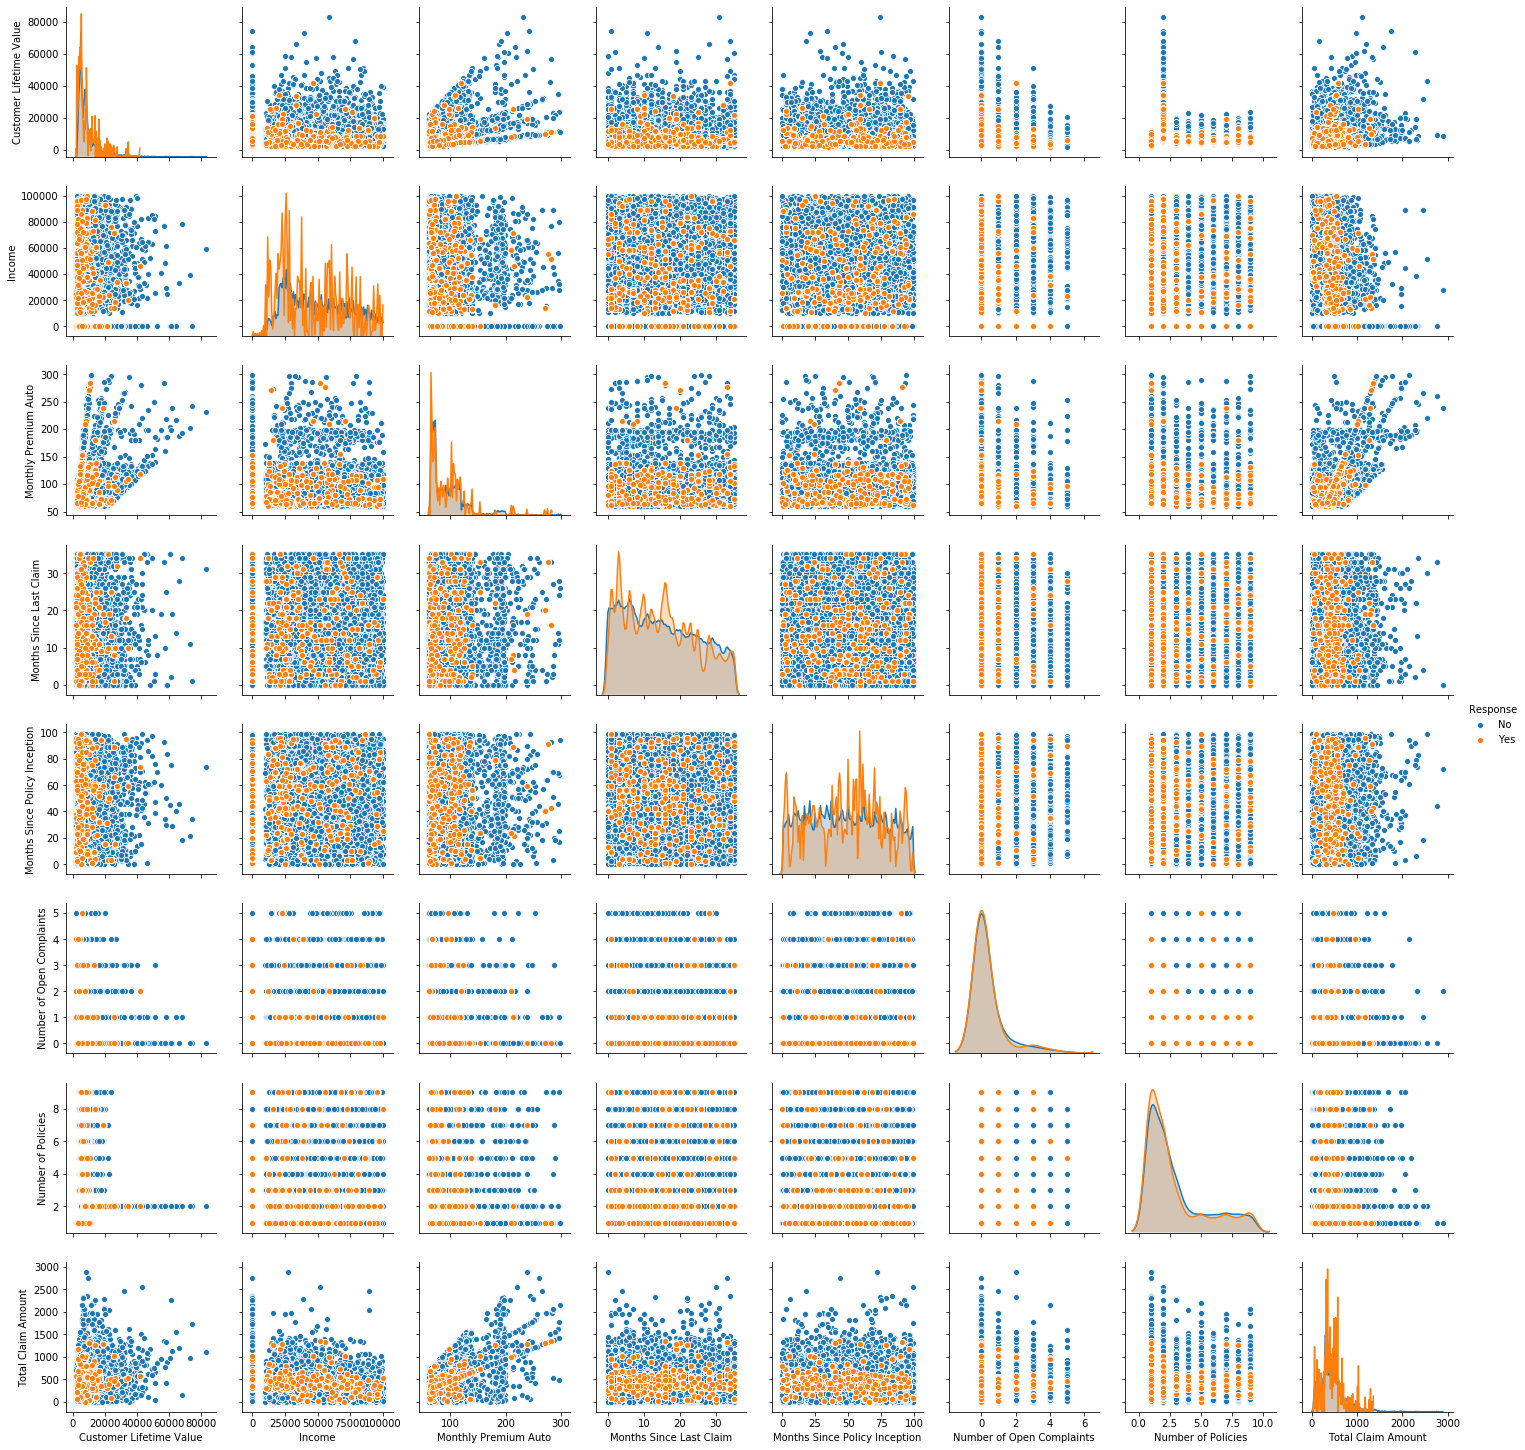

In [14]:
#plot pairwise relationships between numeric features in a dataset
sns.pairplot(data, hue='Response', diag_kws={'bw': 0.5});

It seems there is a direct correlation between the parameters Total Claim Amount and Monthly Premium Auto, and Total Claim Amount and CLV, CLV and Monthly Premium Auto, we can also check the strength of the dependency with heatmap

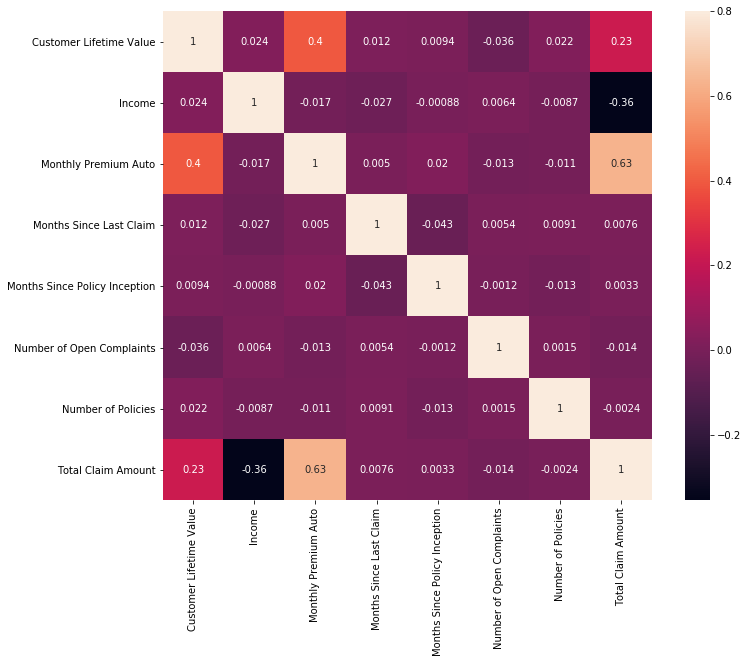

In [15]:
#plot corr. heatmap 
corr = data.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corr, vmax = .8, square = True, annot = True)
plt.show()

So, there is a fairly strong dependence between Monthly Premium Auto and Total Claim Amount (we can see that as the feature Monthly Premium Auto increases, it increases Total Claim Amount), there is a dependence between the other indicators mentioned above, but the dependence is not strong

In [16]:
data[['Customer Lifetime Value', 'Income']].describe()

,Customer Lifetime Value,Income
count,9134.000000,9134.000000
mean,8004.940475,37657.380009
std,6870.967608,30379.904734
min,1898.007675,0.000000
25%,3994.251794,0.000000
50%,5780.182197,33889.500000
75%,8962.167041,62320.000000
max,83325.381190,99981.000000


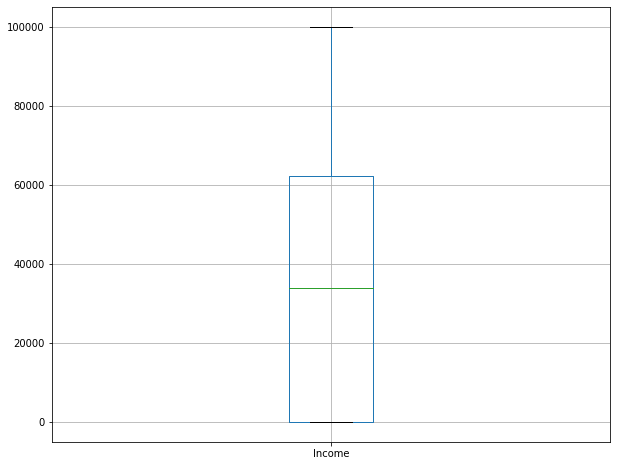

In [17]:
data.boxplot('Income', figsize=(10, 8));

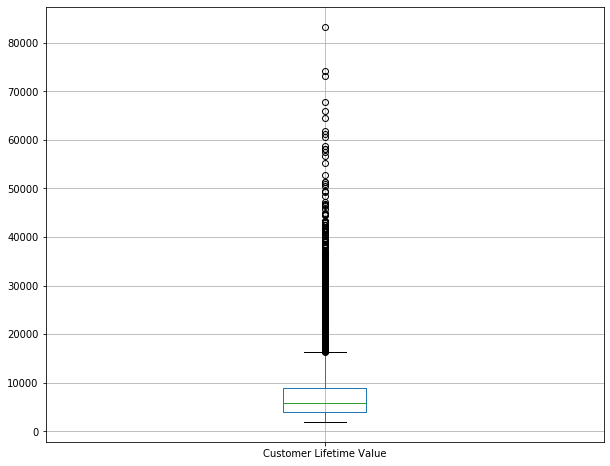

In [18]:
data.boxplot('Customer Lifetime Value', figsize=(10, 8));

The median for CLV about 6000, the mean - about 9000, more than 75% of values about 9000, but there are also max value 83325. For Income the median-about 34000, the mean-about 38000, max-about 100000

In [19]:
data.groupby('EmploymentStatus')['Response'].value_counts()/data['Response'].shape * 100

EmploymentStatus  Response
Disabled          No           3.645719
                  Yes          0.788264
Employed          No          54.105540
                  Yes          8.276768
Medical Leave     No           3.875630
                  Yes          0.853952
Retired           Yes          2.233414
                  No           0.853952
Unemployed        No          23.199037
                  Yes          2.167725
Name: Response, dtype: float64

More than half of the clients are working people(62%). There are only 8 % of them among all clients who would discontinue their insurance. There are about 25% unemployed people. There is a small proportion of Disabled, Medical Leave and Retired clients.

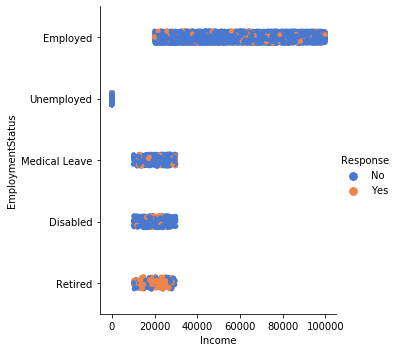

In [20]:
sns.catplot(x='Income', y='EmploymentStatus', hue='Response', data=data, palette="muted");

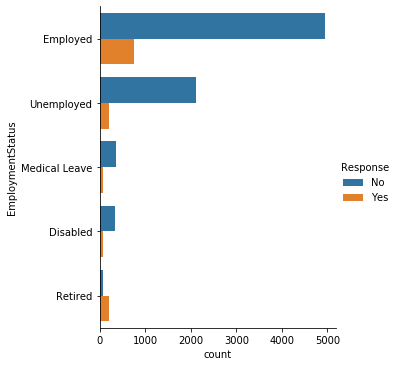

In [21]:
sns.catplot(y='EmploymentStatus', hue='Response', kind='count', data=data);

Among each group of clients, a proportion of retired clients stands out strongly, where the share of customers who would like to renew their insuranceis is greater

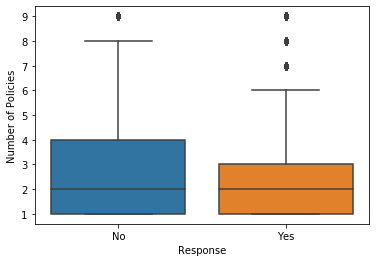

In [22]:
sns.boxplot(x='Response', y='Number of Policies', data=data);

In [23]:
data.groupby('Response')['Number of Policies'].value_counts()

Response  Number of Policies
No        1                     2735
          2                     1952
          3                     1036
          7                      373
          4                      367
          5                      347
          9                      344
          8                      342
          6                      330
Yes       1                      516
          2                      342
          3                      132
          9                       72
          5                       60
          7                       60
          4                       42
          6                       42
          8                       42
Name: Number of Policies, dtype: int64

Among both groups, a greater number of customers preferred to take out 1 insurance, but there are also a large number of customers who have taken out 2 or 3 insurance.

In [24]:
data.groupby('Response')['Number of Open Complaints'].value_counts()

Response  Number of Open Complaints
No        0                            6190
          1                             873
          2                             350
          3                             238
          4                             125
          5                              50
Yes       0                            1062
          1                             138
          3                              54
          2                              24
          4                              24
          5                               6
Name: Number of Open Complaints, dtype: int64

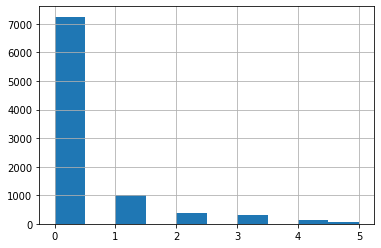

In [25]:
data['Number of Open Complaints'].hist();

Most customers have no open complaints. The maximum number of open complaints is 5

In [26]:
data['Months Since Last Claim'].value_counts().head()

3    381
6    364
1    345
4    335
7    333
Name: Months Since Last Claim, dtype: int64

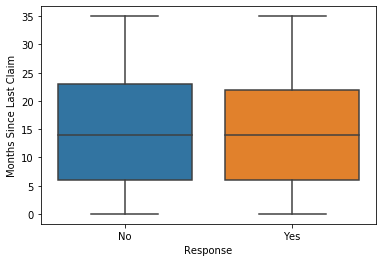

In [27]:
sns.boxplot(x='Response', y='Months Since Last Claim', data=data);

More than 50% of customers have had about 14 months since last claim in both groups

In [28]:
data['Months Since Policy Inception'].value_counts().head()

59    142
61    128
50    125
44    115
10    114
Name: Months Since Policy Inception, dtype: int64

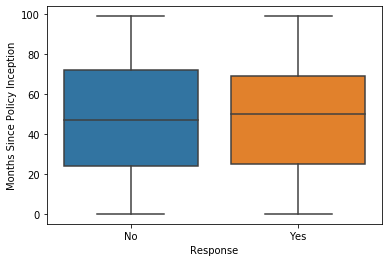

In [29]:
sns.boxplot(x='Response', y='Months Since Policy Inception', data=data);

For those clients who would like to renew their insurance more months have passed since Policy Inception

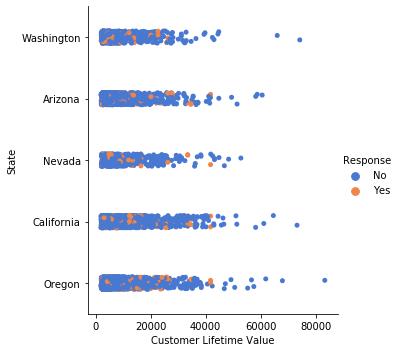

In [30]:
sns.catplot(x='Customer Lifetime Value', y='State', hue='Response', data=data, palette="muted");

Both groups of clients are approximately equally distributed across the states. In all states there are both loyal customers and disloyal ones

In [31]:
data.groupby('State')['Response'].value_counts()/data['State'].count() * 100

State       Response
Arizona     No          15.984235
            Yes          2.660390
California  No          29.494198
            Yes          4.992336
Nevada      No           8.298664
            Yes          1.357565
Oregon      No          24.359536
            Yes          4.116488
Washington  No           7.543245
            Yes          1.193344
Name: Response, dtype: float64

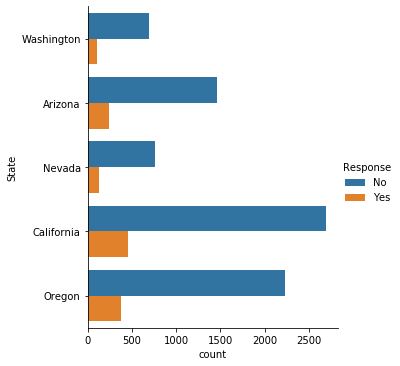

In [32]:
sns.catplot(y='State', hue='Response', kind='count', data=data);

A larger number of customers are from the state of California, a smaller number are from the state of Washington

In [33]:
data['Coverage'].value_counts()/data['Coverage'].shape * 100

Basic       60.959054
Extended    30.019707
Premium      9.021239
Name: Coverage, dtype: float64

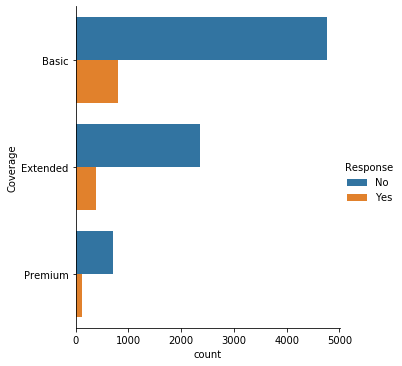

In [34]:
sns.catplot(y='Coverage', hue='Response', kind='count', data=data);

There are 3 Coverage options: Basic, Extended and Premium. More than 60% of clients have opened insurance with Basic Coverage, about 30%-clients with Extended Coverage, and 10%-clients with Premium Coverage

In [35]:
data['Policy Type'].unique()

array(['Corporate Auto', 'Personal Auto', 'Special Auto'], dtype=object)

In [36]:
data['Policy'].unique()

array(['Corporate L3', 'Personal L3', 'Corporate L2', 'Personal L1',
       'Special L2', 'Corporate L1', 'Personal L2', 'Special L1',
       'Special L3'], dtype=object)

There are 3 types of Corporate policies, 3 types of Personal policies and 3 types of Special one

In [37]:
data['Sales Channel'].value_counts()

Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: Sales Channel, dtype: int64

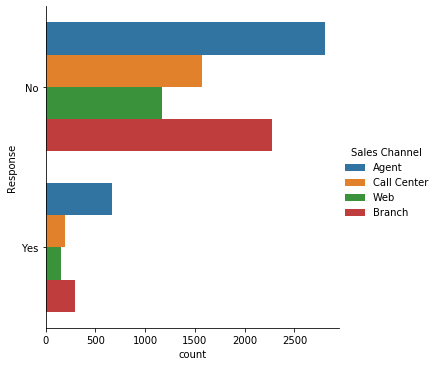

In [38]:
sns.catplot(y='Response', hue='Sales Channel', kind='count', data=data);

There are 4 sales channels:Agent, Call Center, Web, Branch. Among both target groups the main Channel is Agent and then-Branch, Call Center with Web.

All categorial features are well distributed, so we'll keep them and encode to numerical data.

Some columns don't make sense: Customer (it´s just a unique number), Policy is similar to Policy Type, Effective To Date is also not important, so we'll drop them.

The data is unbalanced regarding the  "Response"

We can move on and do a prepocessing.

### Preprocessing & Feature Engineering <a class="anchor" id="part2"></a>

In [39]:
#let's convert the values of the target attribute to numeric
data['Response'].replace({'Yes': 0, 'No': 1}, inplace=True)

In [40]:
#checking duplicates
data.duplicated().sum()

0

In [41]:
#checking for missing values
data.isna().sum().sum()

0

In [42]:
#removing features that do not carry information
data.drop(['Policy Type', 'Customer', 'Effective To Date'], axis=1, inplace=True)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          9134 non-null   object 
 1   Customer Lifetime Value        9134 non-null   float64
 2   Response                       9134 non-null   int64  
 3   Coverage                       9134 non-null   object 
 4   Education                      9134 non-null   object 
 5   EmploymentStatus               9134 non-null   object 
 6   Gender                         9134 non-null   object 
 7   Income                         9134 non-null   int64  
 8   Location Code                  9134 non-null   object 
 9   Marital Status                 9134 non-null   object 
 10  Monthly Premium Auto           9134 non-null   int64  
 11  Months Since Last Claim        9134 non-null   int64  
 12  Months Since Policy Inception  9134 non-null   i

In [44]:
#select X and y in the dataset
X = data.drop(['Response'], axis=1)
y= data['Response']

In [45]:
#numerical_features=data.select_dtypes(include=['int64', 'float64']).columns   # .to_list()
#categorical_features=data.select_dtypes(include=['object']).columns     #.to_list()

# numerical_features = features.dtypes == 'float'
# categorical_features = ~numerical_features

In [46]:
#let's create a ColumnTransformer with standardization of numeric features 
#and converting of categorical features into integers

ct = ColumnTransformer([
       ('scale', StandardScaler(), make_column_selector(dtype_include=['float64', 'int64'])),
       ('oe', OrdinalEncoder(), make_column_selector(dtype_include=object))])

In [47]:
#we will split the data into training and test
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.33, random_state=12345)

In [48]:
#checking the shape of new samples 
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6119, 20), (3015, 20), (6119,), (3015,))

Having finished with the data preprocessing and analysis, we can move on. Let 's create 4 different gradient boosting models first without setting up hyperparameters. We'll use the pipeline. Then we'll check the quality of the models on the test data. And at the end we'll repeat the same thing, only with the hyperparameter settings.

### Training & model building <a class="anchor" id="part3"></a>

As we found out earlier, our target data is unbalanced. Therefore, we will use the sklearn imbalanced library to create pipelines for each model and the RandomUnderSampler technique to reduce the size of the majority class

In [49]:
%%time 
### 1st model from sklearn 

pipe1=pipe_imb(ct, 
                RandomUnderSampler(sampling_strategy=0.5, random_state=12345), 
                GradientBoostingClassifier())      #creating a pipeline
pipe1.fit(X_train, y_train) # training
pred1 = pipe1.predict(X_test) # predictions

Wall time: 573 ms


In [50]:
print(classification_report_imbalanced(y_test, pred1)) 

                   pre       rec       spe        f1       geo       iba       sup

          0       0.61      0.69      0.93      0.65      0.80      0.63       419
          1       0.95      0.93      0.69      0.94      0.80      0.66      2596

avg / total       0.90      0.90      0.72      0.90      0.80      0.65      3015



In [51]:
f1_score_1=f1_score(y_test, pred1, average='weighted')
roc_auc_1=roc_auc_score(y_test, pred1, average='weighted')
print(f1_score_1, roc_auc_1)

0.8984591794084427 0.8094295979494799


Both quality metrics turned out to be quite good


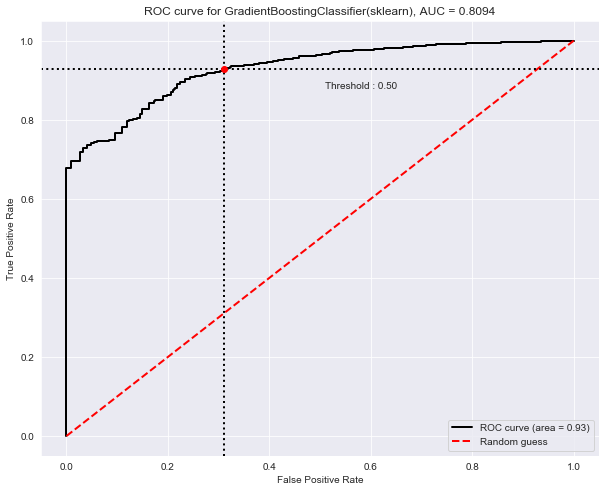

In [52]:
# Visualisation with plot_metric
bc = BinaryClassification(y_test, pipe1.predict_proba(X_test)[:,1], labels=["Class 1", "Class 2"])

plt.figure(figsize=(10, 8))
bc.plot_roc_curve()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for GradientBoostingClassifier(sklearn), AUC = %.4f'%roc_auc_1)
plt.show()

In this plot, we also see a good work of the classifier in the distribution of objects by classes, the area under the curve is equal to 0.93

In [53]:
%%time
### 2nd model from XGBoost ###

pipe2=pipe_imb(ct, 
                    RandomUnderSampler(random_state=12345), 
                    XGBClassifier())
pipe2.fit(X_train, y_train)
pred2=pipe2.predict(X_test)

[20:30:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 237 ms


In [54]:
print(classification_report_imbalanced(y_test, pred2))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.54      1.00      0.86      0.70      0.93      0.87       419
          1       1.00      0.86      1.00      0.93      0.93      0.85      2596

avg / total       0.94      0.88      0.98      0.89      0.93      0.85      3015



In [55]:
f1_score_2=f1_score(y_test, pred2, average='weighted')
roc_auc_2=roc_auc_score(y_test, pred2, average='weighted')
print(f1_score_2, roc_auc_2)

0.8940894043860456 0.9306625577812018


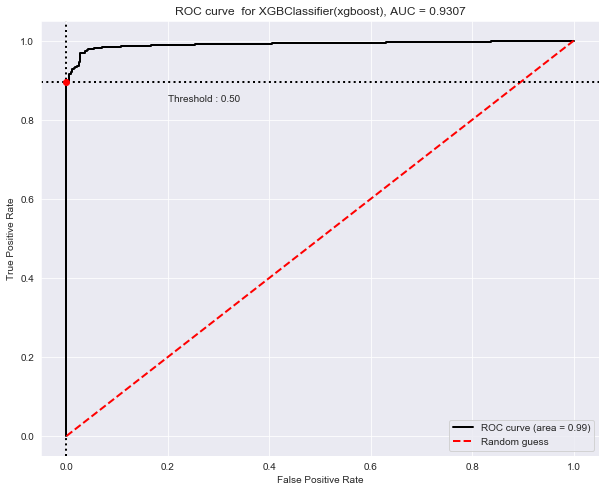

In [56]:
# Visualisation 
bc = BinaryClassification(y_test, pipe2.predict_proba(X_test)[:,1], labels=["Class 1", "Class 2"])

plt.figure(figsize=(10, 8))
bc.plot_roc_curve()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve  for XGBClassifier(xgboost), AUC = %.4f'%roc_auc_2)
plt.show()

Metrics for the model from the XGBoost turned out to be even higher than for the first model

In [57]:
%%time
### 3d model from CatBoost ###
cat_features = list(X_train.select_dtypes( 
         include='object').columns)
catboost=CatBoostClassifier(random_state=12345, scale_pos_weight=sum(y_train==0)/sum(y_train==1))
catboost.fit(X_train, y_train, cat_features=cat_features)
pred_catboost=catboost.predict(X_test)


Learning rate set to 0.022328
0:	learn: 0.6848490	total: 206ms	remaining: 3m 25s
1:	learn: 0.6746568	total: 248ms	remaining: 2m 3s
2:	learn: 0.6658961	total: 276ms	remaining: 1m 31s
3:	learn: 0.6580409	total: 304ms	remaining: 1m 15s
4:	learn: 0.6510263	total: 330ms	remaining: 1m 5s
5:	learn: 0.6441855	total: 357ms	remaining: 59.2s
6:	learn: 0.6369929	total: 385ms	remaining: 54.6s
7:	learn: 0.6292562	total: 410ms	remaining: 50.8s
8:	learn: 0.6251741	total: 428ms	remaining: 47.1s
9:	learn: 0.6193697	total: 456ms	remaining: 45.1s
10:	learn: 0.6140228	total: 480ms	remaining: 43.2s
11:	learn: 0.6080922	total: 507ms	remaining: 41.8s
12:	learn: 0.6029543	total: 538ms	remaining: 40.8s
13:	learn: 0.5982587	total: 565ms	remaining: 39.8s
14:	learn: 0.5940130	total: 590ms	remaining: 38.7s
15:	learn: 0.5895016	total: 615ms	remaining: 37.8s
16:	learn: 0.5849410	total: 644ms	remaining: 37.2s
17:	learn: 0.5797748	total: 670ms	remaining: 36.5s
18:	learn: 0.5746887	total: 697ms	remaining: 36s
19:	learn:

In [58]:
print(classification_report(y_test, pred_catboost))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88       419
           1       1.00      0.96      0.98      2596

    accuracy                           0.96      3015
   macro avg       0.90      0.97      0.93      3015
weighted avg       0.97      0.96      0.97      3015



In [59]:
f1_score_3=f1_score(y_test, pred_catboost, average='weighted')
roc_auc_3=roc_auc_score(y_test, pred_catboost, average='weighted')
print(f1_score_3, roc_auc_3)

0.9658495603375736 0.9683835237615425


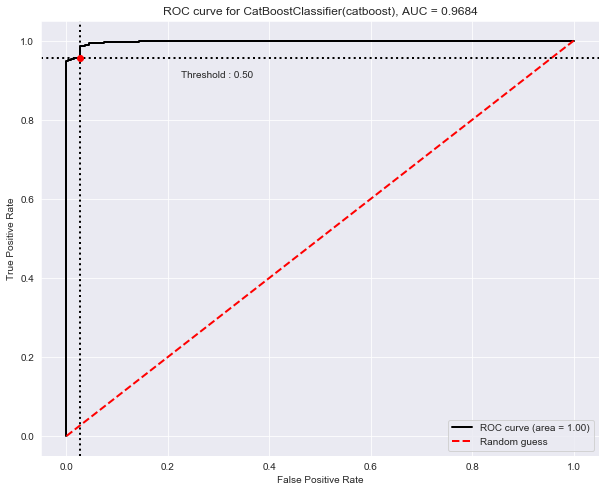

In [60]:
# Visualisation 
bc = BinaryClassification(y_test, catboost.predict_proba(X_test)[:,1], labels=["Class 1", "Class 2"])

plt.figure(figsize=(10, 8))
bc.plot_roc_curve()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for CatBoostClassifier(catboost), AUC = %.4f'%roc_auc_3)
plt.show()

The CatBoost model is in the lead, quality metrics have become better, the area under the curve on the plot has become larger

In [61]:
%%time 
### 4th model from LightGBM ###

pipe4=pipe_imb(ct, 
                    RandomUnderSampler(random_state=12345), 
                    LGBMClassifier())
pipe4.fit(X_train, y_train)
pred4=pipe4.predict(X_test)

Wall time: 121 ms


In [62]:
print(classification_report_imbalanced(y_test, pred4))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.56      0.99      0.88      0.72      0.93      0.87       419
          1       1.00      0.88      0.99      0.93      0.93      0.85      2596

avg / total       0.94      0.89      0.97      0.90      0.93      0.86      3015



In [63]:
f1_score_4=f1_score(y_test, pred4, average='weighted')
roc_auc_4=roc_auc_score(y_test, pred4, average='weighted')
print(f1_score_4, roc_auc_4)

0.9028550493402187 0.9310142094869654


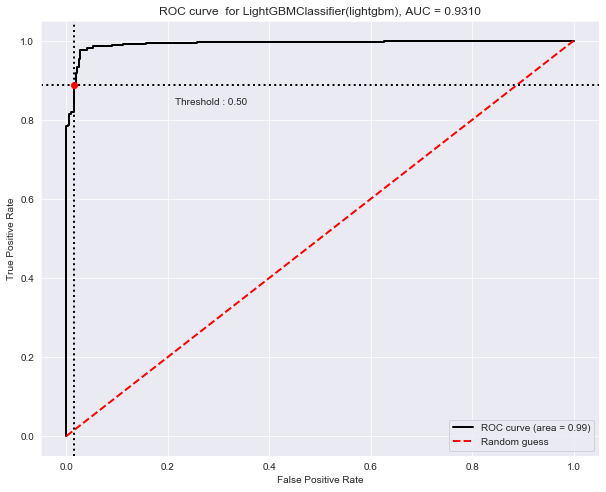

In [64]:
# Visualisation 
bc = BinaryClassification(y_test, pipe4.predict_proba(X_test)[:,1], labels=["Class 1", "Class 2"])

plt.figure(figsize=(10, 8))
bc.plot_roc_curve()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve  for LightGBMClassifier(lightgbm), AUC = %.4f'%roc_auc_4)
plt.show()

The model from LightGBM is also good enough in terms of our metrics

In [65]:
# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['GradientBoostingClassifier(sklearn)', 'XGBClassifier(xgboost)',
                                           'CatBoostClassifier(catboost)', 'LGBMClassifier(lightgbm)'],
                                 'f1_score': [f1_score_1, f1_score_2, f1_score_3, f1_score_4],
                                 'roc_auc_score': [roc_auc_1, roc_auc_2, roc_auc_3, roc_auc_4]})

In [66]:
model_comparison = model_comparison.set_index('model')
print(model_comparison)

                                     f1_score  roc_auc_score
model                                                       
GradientBoostingClassifier(sklearn)  0.898459       0.809430
XGBClassifier(xgboost)               0.894089       0.930663
CatBoostClassifier(catboost)         0.965850       0.968384
LGBMClassifier(lightgbm)             0.902855       0.931014


The best model is CatBoostClassifier, model's f1-measure and roc_auc are the highest(about 0.97 both).

Let's tune our models with GridSearchCV and try to improve our metrics.

In [67]:
#create a scorer for inbalanced data
f1 = make_scorer(f1_score , average='weighted')

In [68]:
pipe1.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'columntransformer', 'randomundersampler', 'gradientboostingclassifier', 'columntransformer__n_jobs', 'columntransformer__remainder', 'columntransformer__sparse_threshold', 'columntransformer__transformer_weights', 'columntransformer__transformers', 'columntransformer__verbose', 'columntransformer__verbose_feature_names_out', 'columntransformer__scale', 'columntransformer__oe', 'columntransformer__scale__copy', 'columntransformer__scale__with_mean', 'columntransformer__scale__with_std', 'columntransformer__oe__categories', 'columntransformer__oe__dtype', 'columntransformer__oe__handle_unknown', 'columntransformer__oe__unknown_value', 'randomundersampler__random_state', 'randomundersampler__replacement', 'randomundersampler__sampling_strategy', 'gradientboostingclassifier__ccp_alpha', 'gradientboostingclassifier__criterion', 'gradientboostingclassifier__init', 'gradientboostingclassifier__learning_rate', 'gradientboostingclassifier__loss', 'gradi

In [69]:
%%time
param_grid1 = {
    'gradientboostingclassifier__max_depth': [12],
    'gradientboostingclassifier__n_estimators': [50],
    'gradientboostingclassifier__min_samples_split': [4],
    'gradientboostingclassifier__min_samples_leaf': [1],
    'gradientboostingclassifier__learning_rate': [1] }

grid1 = GridSearchCV(pipe1, param_grid1, cv=5, scoring=f1, verbose=0)
grid1.fit(X_train, y_train)
print(grid1.best_params_)
print(grid1.best_score_)

#'gradientboostingclassifier__max_depth': [5, 8, 10, 12],
#    'gradientboostingclassifier__n_estimators': [20, 50, 100],
#   'gradientboostingclassifier__min_samples_split': [2, 4, 6],
#    'gradientboostingclassifier__min_samples_leaf': [1, 3, 5],
#   'gradientboostingclassifier__learning_rate': [0.01, 0.1, 1] 
#{'gradientboostingclassifier__learning_rate': 1, 'gradientboostingclassifier__max_depth': 12, 'gradientboostingclassifier__min_samples_leaf': 1, 'gradientboostingclassifier__min_samples_split': 4, 'gradientboostingclassifier__n_estimators': 50}
#0.986629147896401

{'gradientboostingclassifier__learning_rate': 1, 'gradientboostingclassifier__max_depth': 12, 'gradientboostingclassifier__min_samples_leaf': 1, 'gradientboostingclassifier__min_samples_split': 4, 'gradientboostingclassifier__n_estimators': 50}
0.983332637503634
Wall time: 4.31 s


In [70]:
%%time
pipe1.set_params(**grid1.best_params_)
pipe1.fit(X_train, y_train)
predictions1 = pipe1.predict(X_test)

Wall time: 763 ms


In [71]:
print(classification_report_imbalanced(y_test, predictions1))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.93      0.99      0.99      0.95      0.99      0.97       419
          1       1.00      0.99      0.99      0.99      0.99      0.97      2596

avg / total       0.99      0.99      0.99      0.99      0.99      0.97      3015



In [72]:
f1_score_1_1=f1_score(y_test, predictions1, average='weighted')
roc_auc_1_1=roc_auc_score(y_test, predictions1, average='weighted')
print(f1_score_1_1, roc_auc_1_1)

0.9872327477319432 0.986484163262004


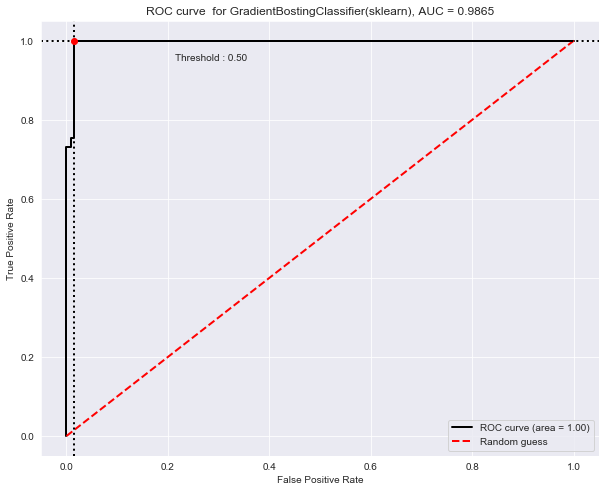

In [73]:
# Visualisation with plot_metric
bc = BinaryClassification(y_test, pipe1.predict_proba(X_test)[:,1], labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(10, 8))
bc.plot_roc_curve()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve  for GradientBostingClassifier(sklearn), AUC = %.4f'%roc_auc_1_1)
plt.show()

In [74]:
%%time
param_grid2 = {
    'xgbclassifier__max_depth': [10],
    'xgbclassifier__n_estimators': [300]}
grid2 = GridSearchCV(pipe2, param_grid2, cv=5, scoring=f1, verbose=0)
grid2.fit(X_train, y_train)

print(grid2.best_params_, grid2.best_score_)

#{'xgbclassifier__n_estimators': [50, 100, 300, 500, 800, 1000]} 0.9018252389252185 (300 n_est.)
#{'xgbclassifier__max_depth': [6, 8, 10, 12, 15, 20], 'xgbclassifier__n_estimators': 300} 0.9018252389252185 (300 n_est., max_depth 10)

[20:30:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:31:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:31:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:31:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [75]:
%%time
pipe2.set_params(**grid2.best_params_)
pipe2.fit(X_train, y_train)
predictions2 = pipe2.predict(X_test)

[20:31:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 567 ms


In [76]:
print(classification_report_imbalanced(y_test, predictions2))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.58      1.00      0.88      0.73      0.94      0.89       419
          1       1.00      0.88      1.00      0.94      0.94      0.87      2596

avg / total       0.94      0.90      0.98      0.91      0.94      0.88      3015



In [77]:
f1_score_1_2=f1_score(y_test, predictions2, average='weighted')
roc_auc_1_2=roc_auc_score(y_test, predictions2, average='weighted')
print(f1_score_1_2, roc_auc_1_2)

0.9097321627774656 0.9416409861325116


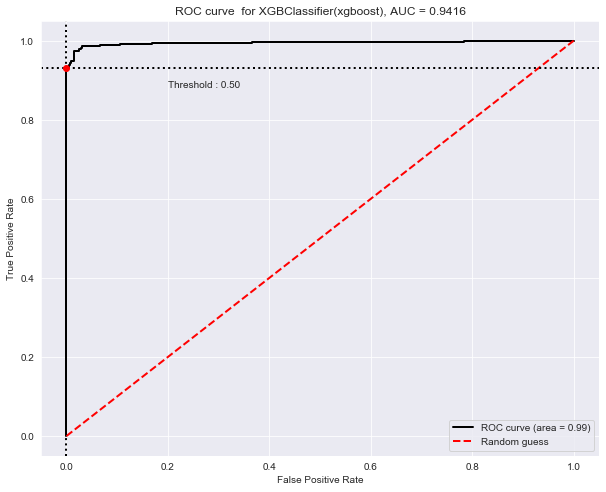

In [78]:
# Visualisation 
bc = BinaryClassification(y_test, pipe2.predict_proba(X_test)[:,1], labels=["Class 1", "Class 2"])

plt.figure(figsize=(10, 8))
bc.plot_roc_curve()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve  for XGBClassifier(xgboost), AUC = %.4f'%roc_auc_1_2)
plt.show()

In [79]:
%%time
param_grid3 = {
    'depth': [12],
    'iterations': [500]}
grid3 = GridSearchCV(catboost, param_grid3, cv=5, scoring=f1, verbose=0)
grid3.fit(X_train, y_train, cat_features=cat_features)
print(grid3.best_params_, grid3.best_score_)

#{'iterations': 50, 80, 100, 200, 300, 500, 800, 1000} best score 0.9625798492961974 (500 it.)
#{'depth': 4, 6, 8, 10, 12, 15, 20,    'iterations': 500}  0.9902644551315435 (12 depth, 500 it.)

Learning rate set to 0.038327
0:	learn: 0.6639386	total: 159ms	remaining: 1m 19s
1:	learn: 0.6336555	total: 321ms	remaining: 1m 19s
2:	learn: 0.6090960	total: 484ms	remaining: 1m 20s
3:	learn: 0.5812187	total: 649ms	remaining: 1m 20s
4:	learn: 0.5569681	total: 815ms	remaining: 1m 20s
5:	learn: 0.5346387	total: 992ms	remaining: 1m 21s
6:	learn: 0.5148807	total: 1.17s	remaining: 1m 22s
7:	learn: 0.4966066	total: 1.34s	remaining: 1m 22s
8:	learn: 0.4769499	total: 1.53s	remaining: 1m 23s
9:	learn: 0.4641866	total: 1.7s	remaining: 1m 23s
10:	learn: 0.4510122	total: 1.87s	remaining: 1m 23s
11:	learn: 0.4366835	total: 2.04s	remaining: 1m 23s
12:	learn: 0.4227577	total: 2.24s	remaining: 1m 23s
13:	learn: 0.4094493	total: 2.42s	remaining: 1m 23s
14:	learn: 0.3962218	total: 2.59s	remaining: 1m 23s
15:	learn: 0.3872837	total: 2.76s	remaining: 1m 23s
16:	learn: 0.3747043	total: 2.93s	remaining: 1m 23s
17:	learn: 0.3638871	total: 3.09s	remaining: 1m 22s
18:	learn: 0.3527693	total: 3.27s	remaining: 

In [80]:
%%time
catboost = CatBoostClassifier(random_state=12345, scale_pos_weight=sum(y_train==0)/sum(y_train==1)).set_params(**grid3.best_params_)
catboost.fit(X_train, y_train, cat_features=cat_features)
predictions3 = catboost.predict(X_test)

Learning rate set to 0.042159
0:	learn: 0.6614138	total: 151ms	remaining: 1m 15s
1:	learn: 0.6331397	total: 317ms	remaining: 1m 18s
2:	learn: 0.6042098	total: 472ms	remaining: 1m 18s
3:	learn: 0.5774014	total: 640ms	remaining: 1m 19s
4:	learn: 0.5565214	total: 825ms	remaining: 1m 21s
5:	learn: 0.5280193	total: 999ms	remaining: 1m 22s
6:	learn: 0.5069177	total: 1.2s	remaining: 1m 24s
7:	learn: 0.4885118	total: 1.39s	remaining: 1m 25s
8:	learn: 0.4668817	total: 1.58s	remaining: 1m 26s
9:	learn: 0.4484423	total: 1.78s	remaining: 1m 27s
10:	learn: 0.4341822	total: 1.96s	remaining: 1m 27s
11:	learn: 0.4184870	total: 2.16s	remaining: 1m 27s
12:	learn: 0.4044231	total: 2.37s	remaining: 1m 28s
13:	learn: 0.3915208	total: 2.57s	remaining: 1m 29s
14:	learn: 0.3802042	total: 2.78s	remaining: 1m 29s
15:	learn: 0.3666033	total: 2.99s	remaining: 1m 30s
16:	learn: 0.3541045	total: 3.19s	remaining: 1m 30s
17:	learn: 0.3432218	total: 3.35s	remaining: 1m 29s
18:	learn: 0.3312999	total: 3.52s	remaining: 

In [81]:
print(classification_report(y_test, predictions3))

              precision    recall  f1-score   support

           0       0.95      0.99      0.96       419
           1       1.00      0.99      0.99      2596

    accuracy                           0.99      3015
   macro avg       0.97      0.99      0.98      3015
weighted avg       0.99      0.99      0.99      3015



In [82]:
f1_score_1_3=f1_score(y_test, predictions3, average='weighted')
roc_auc_1_3=roc_auc_score(y_test, predictions3, average='weighted')
print(f1_score_1_3, roc_auc_1_3)

0.9901370602201791 0.988217599317474


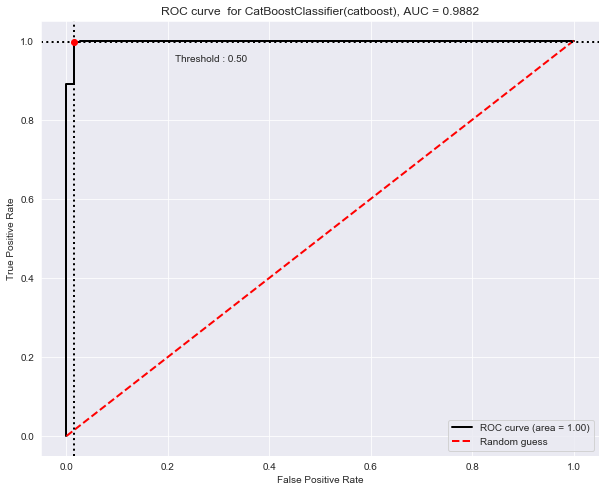

In [83]:
# Visualisation
bc = BinaryClassification(y_test, catboost.predict_proba(X_test)[:,1], labels=["Class 1", "Class 2"])

plt.figure(figsize=(10, 8))
bc.plot_roc_curve()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve  for CatBoostClassifier(catboost), AUC = %.4f'%roc_auc_1_3)
plt.show()

In [84]:
pipe4.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'columntransformer', 'randomundersampler', 'lgbmclassifier', 'columntransformer__n_jobs', 'columntransformer__remainder', 'columntransformer__sparse_threshold', 'columntransformer__transformer_weights', 'columntransformer__transformers', 'columntransformer__verbose', 'columntransformer__verbose_feature_names_out', 'columntransformer__scale', 'columntransformer__oe', 'columntransformer__scale__copy', 'columntransformer__scale__with_mean', 'columntransformer__scale__with_std', 'columntransformer__oe__categories', 'columntransformer__oe__dtype', 'columntransformer__oe__handle_unknown', 'columntransformer__oe__unknown_value', 'randomundersampler__random_state', 'randomundersampler__replacement', 'randomundersampler__sampling_strategy', 'lgbmclassifier__boosting_type', 'lgbmclassifier__class_weight', 'lgbmclassifier__colsample_bytree', 'lgbmclassifier__importance_type', 'lgbmclassifier__learning_rate', 'lgbmclassifier__max_depth', 'lgbmclassifier__mi

In [85]:
%%time
param_grid4 = {
    'lgbmclassifier__max_depth': [12],
    'lgbmclassifier__n_estimators': [1000],
    'lgbmclassifier__num_leaves': [20],
    'lgbmclassifier__is_unbalance': [True]}
grid4 = GridSearchCV(pipe4, param_grid4, cv=5, scoring='f1', verbose=0)
grid4.fit(X_train, y_train)

print(grid4.best_params_, grid4.best_score_)

#{'lgbmclassifier__max_depth': [10, 12, 15, 20], 'lgbmclassifier__n_estimators': 100, 300, 500, 800, 1000, 
#'lgbmclassifier__num_leaves': 8, 10, 12, 15,20}
# 0.934531294258697 (max_depth 12, n_est. 1000, num_leaves 20)

{'lgbmclassifier__is_unbalance': True, 'lgbmclassifier__max_depth': 12, 'lgbmclassifier__n_estimators': 1000, 'lgbmclassifier__num_leaves': 20} 0.9345385243445554
Wall time: 3.16 s


In [86]:
%%time
pipe4.set_params(**grid4.best_params_)
pipe4.fit(X_train, y_train)
predictions4 = pipe4.predict(X_test)

Wall time: 614 ms


In [87]:
print(classification_report_imbalanced(y_test, predictions4))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.62      1.00      0.90      0.76      0.95      0.91       419
          1       1.00      0.90      1.00      0.95      0.95      0.89      2596

avg / total       0.95      0.91      0.99      0.92      0.95      0.89      3015



In [88]:
f1_score_1_4=f1_score(y_test, predictions4, average='weighted')
roc_auc_1_4=roc_auc_score(y_test, predictions4, average='weighted')
print(f1_score_1_4, roc_auc_1_4)

0.9214211752127894 0.9497303543913713


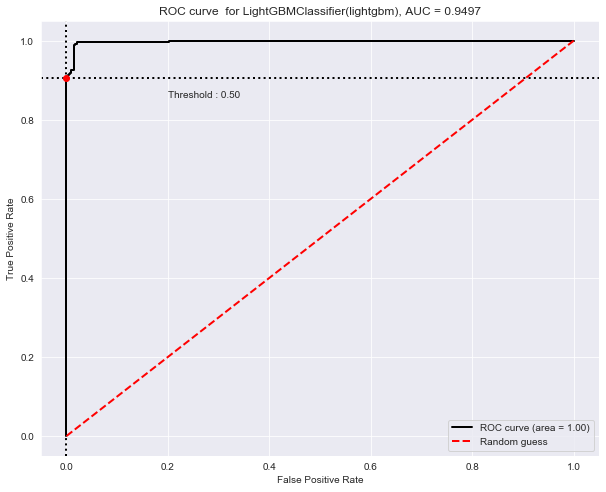

In [89]:
# Visualization 
bc = BinaryClassification(y_test, pipe4.predict_proba(X_test)[:,1], labels=["Class 1", "Class 2"])

plt.figure(figsize=(10, 8))
bc.plot_roc_curve()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve  for LightGBMClassifier(lightgbm), AUC = %.4f'%roc_auc_1_4)
plt.show()

In [90]:
# Dataframe to hold the results
model_comparison2 = pd.DataFrame({'model': ['GradientBoostingClassifier(sklearn)', 'XGBClassifier(xgboost)',
                                           'CatBoostClassifier(catboost)', 'LGBMClassifier(lightgbm)'],
                                 'f1_score': [f1_score_1_1, f1_score_1_2, f1_score_1_3, f1_score_1_4],
                                 'roc_auc_score': [roc_auc_1_1, roc_auc_1_2, roc_auc_1_3, roc_auc_1_4]})

In [91]:
model_comparison2=model_comparison2.set_index('model')
print(model_comparison2)

                                     f1_score  roc_auc_score
model                                                       
GradientBoostingClassifier(sklearn)  0.987233       0.986484
XGBClassifier(xgboost)               0.909732       0.941641
CatBoostClassifier(catboost)         0.990137       0.988218
LGBMClassifier(lightgbm)             0.921421       0.949730


After tuning the models, the quality of the models has improved, and the implementation from CatBoost is in the lead. Both metrics are about 0.99.

In [92]:
#creating a function to display the importance of features when building models
def plot_feature_importance(importance,names,model_type):
    
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    #Create a DataFrame
    data= pd.DataFrame({'feature_names':feature_names,'feature_importance':feature_importance})
    
    #Sort the DataFrame in order decreasing feature importance
    data.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    
    plt.figure(figsize=(10,8))
    sns.barplot(x=data['feature_importance'], y=data['feature_names'])
    
    plt.title('FEATURE IMPORTANCE ' + model_type)
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

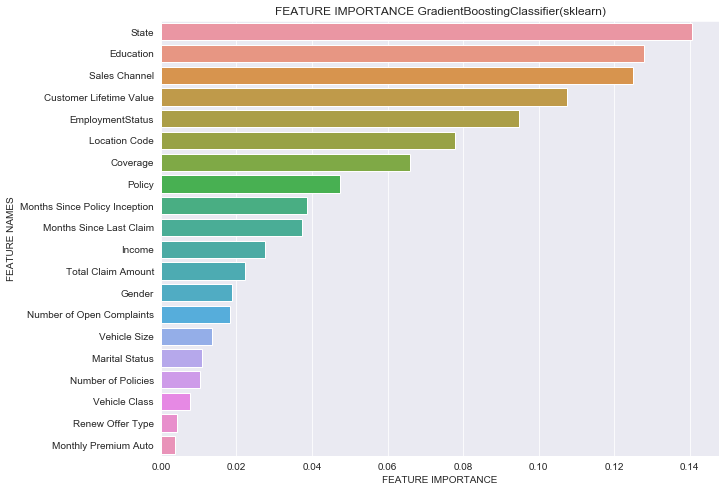

In [93]:
#plot the feature importance

plot_feature_importance((pipe1.steps[2][1]).feature_importances_,X_train.columns,'GradientBoostingClassifier(sklearn)')

For the first model, the main features turned out to be State, Education, Sales channel, and less important are Monthly Premium Auto, Renew Offer Type

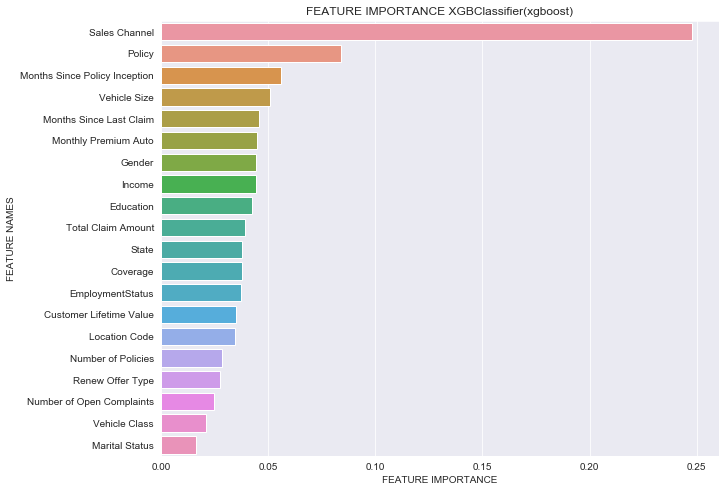

In [94]:
plot_feature_importance((pipe2.steps[2][1]).feature_importances_,X_train.columns,'XGBClassifier(xgboost)')

For the second model, the main feature is Sales channel(almost 25%), and less important are Marital Status, Vehicle Class

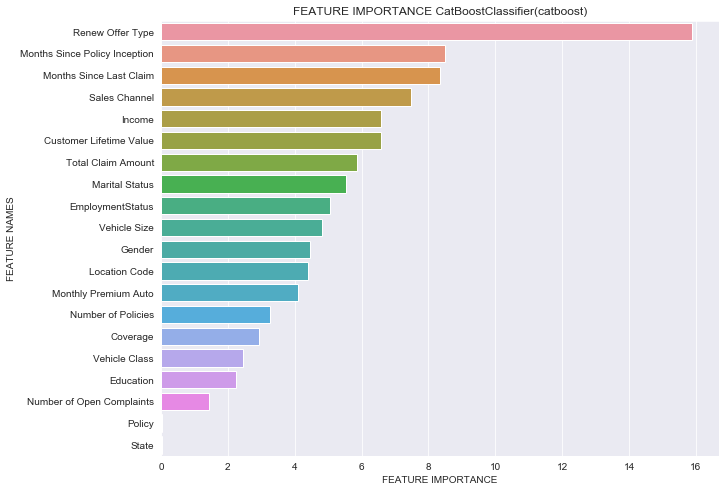

In [95]:
plot_feature_importance(catboost.feature_importances_,X_train.columns,'CatBoostClassifier(catboost)')

For the CatBoost model, most important feature is Renew Offer Type, and less important are State and Policy

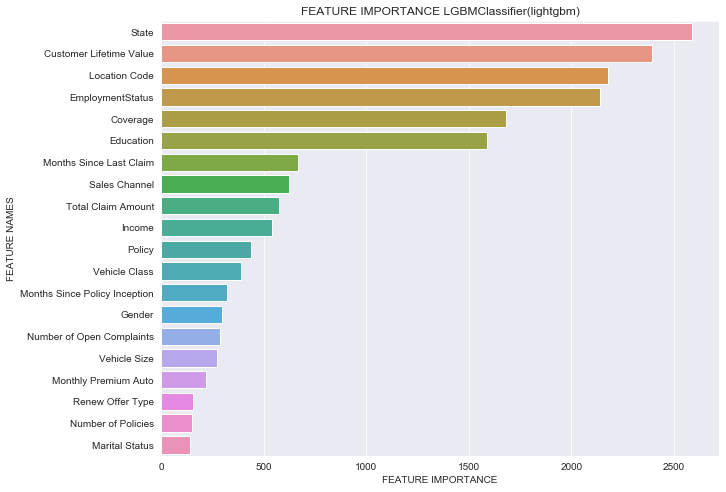

In [96]:
plot_feature_importance((pipe4.steps[2][1]).feature_importances_,X_train.columns,'LGBMClassifier(lightgbm)')

For the LightGBM model, most important features are State, CLV, and less important are Marital Status, Number of Policies, Renew Offer Type

### Conclusion <a class="anchor" id="part4"></a>

  So, we did a small EDA, prepared the data, trained 4 classification models (from sklearn, xgboost, catboost and lightgbm) with basic parameters and then with hyperparameter tuning.

  The target variable is unbalanced. We chose f1_score and roc_auc_score as quality metrics.  
The implementation of the CatBoost model proved to be better both before setting up hyperparameters (quality metrics were about 0.97) and after (quality metrics became equal to about 0.99). 

  The most important feature for the best model was Renew Offer Type